In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### READ THE DATASET

In [6]:
df =pd.read_csv('petrol_consumption.csv')

In [7]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [5]:
df.corrwith(df['Petrol_Consumption'])

Petrol_tax                     -0.451280
Average_income                 -0.244862
Paved_Highways                  0.019042
Population_Driver_licence(%)    0.698965
Petrol_Consumption              1.000000
dtype: float64

In [8]:
x = df.drop('Petrol_Consumption', axis =1)
y = df['Petrol_Consumption']

# regression --> categoriacal or continuous  o/p variable(does not have classes)


In [10]:
x.shape

(48, 4)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [12]:
x_train.shape

(36, 4)

In [13]:
x_test.shape

(12, 4)

##### BUILD THE MODEL

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
regressor = DecisionTreeRegressor(random_state=0)

In [16]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

### plot the tree`

In [21]:
from sklearn.tree import plot_tree

[Text(0.7556475903614458, 0.95, 'Population_Driver_licence(%) <= 0.667\nsquared_error = 14057.775\nsamples = 36\nvalue = 587.944'),
 Text(0.5594879518072289, 0.85, 'Average_income <= 4389.5\nsquared_error = 6844.265\nsamples = 32\nvalue = 559.719'),
 Text(0.34789156626506024, 0.75, 'Petrol_tax <= 8.75\nsquared_error = 2883.39\nsamples = 20\nvalue = 603.1'),
 Text(0.20180722891566266, 0.65, 'Average_income <= 3731.5\nsquared_error = 2410.782\nsamples = 15\nvalue = 621.533'),
 Text(0.0963855421686747, 0.55, 'Average_income <= 3645.5\nsquared_error = 1251.188\nsamples = 4\nvalue = 672.25'),
 Text(0.04819277108433735, 0.45, 'Population_Driver_licence(%) <= 0.605\nsquared_error = 100.0\nsamples = 2\nvalue = 638.0'),
 Text(0.024096385542168676, 0.35, 'squared_error = 0.0\nsamples = 1\nvalue = 628.0'),
 Text(0.07228915662650602, 0.35, 'squared_error = 0.0\nsamples = 1\nvalue = 648.0'),
 Text(0.14457831325301204, 0.45, 'Population_Driver_licence(%) <= 0.552\nsquared_error = 56.25\nsamples = 2\

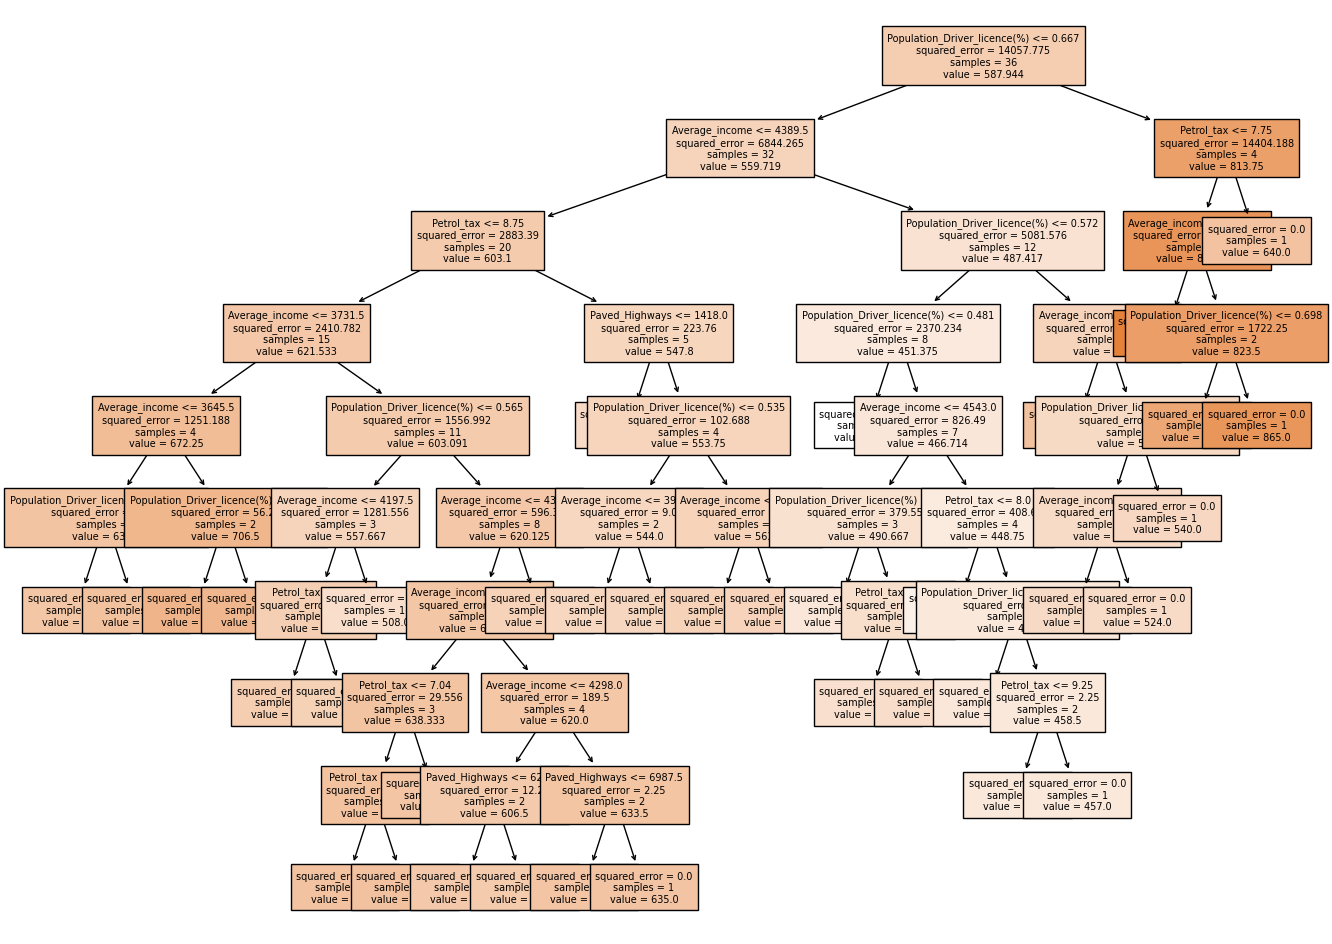

In [25]:
plt.figure(figsize=(16,12))
plot_tree(regressor, fontsize=7, filled=True, feature_names=x.columns.tolist())

#### EVALUATE THE  MODEL

In [26]:
y_pred = regressor.predict(x_test)

In [27]:
result = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_pred
})

In [28]:
result

,Actual,Predicted
29,534,541.0
4,410,498.0
26,577,628.0
30,571,628.0
32,577,628.0
37,704,644.0
34,487,628.0
40,587,649.0
7,467,414.0
10,580,464.0


In [30]:
np.mean(abs(y_test-y_pred))

68.08333333333333

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [33]:
mean_absolute_error(y_test, y_pred)

68.08333333333333

In [34]:
mean_absolute_percentage_error(y_test, y_pred)

0.1294003614849453

In [35]:
imp = regressor.feature_importances_

<BarContainer object of 4 artists>

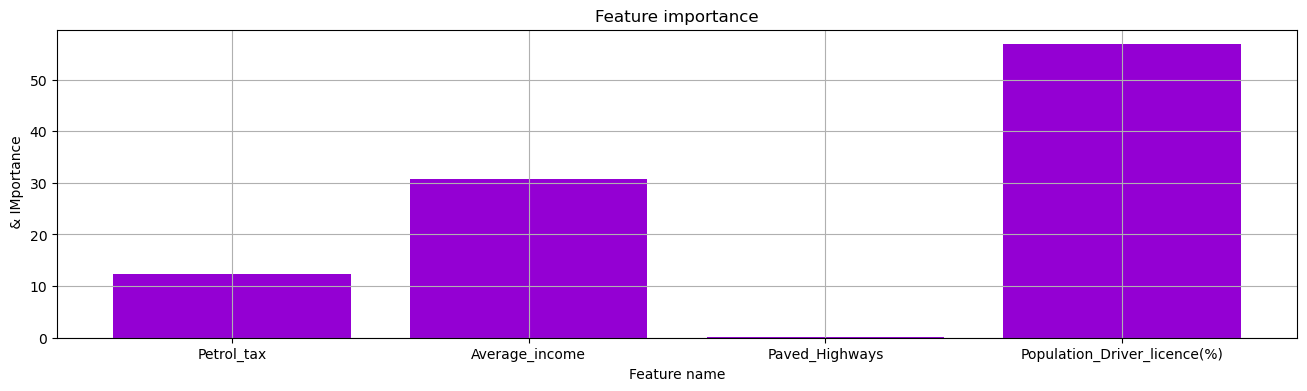

In [37]:
plt.figure(figsize=(16,4))
plt.title('Feature importance')
plt.grid()
plt.xlabel('Feature name')
plt.ylabel(' & IMportance')
plt.bar(x.columns, imp*100, color = 'darkviolet')

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
new1 = [[8.00, 5319, 8868, 0.451]]
new2 = [[7.00, 3745, 2611, 0.508]]

In [43]:
regressor.predict(new1)

array([344.])

In [44]:
regressor.predict(new2)

array([591.])

# K-Nearest neighbour

<!-- #  Eucledian formula = sqrt((x1 - x2 )^2 + (y1-y2)^2)

# # tomato =(6,42)
# grape = 2.2
# gb = 4.2
# nuts = 3.6
# o= 1.4
 -->

In [2]:
# Xnew = (X - min(X))/(max(X)- min(X))